In [292]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

In [295]:
train = pd.read_csv(r"F:\Dataset\Loan Prediction\train.csv",encoding='utf-8')
test = pd.read_csv(r"F:\Dataset\Loan Prediction\test.csv",encoding='utf-8')

In [296]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [297]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [298]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [299]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [223]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Gender

In [63]:
train['Gender'].isnull().sum()

13

In [64]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

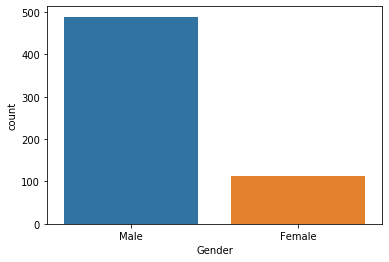

In [65]:
sns.countplot(train.Gender)
plt.show()

In [67]:
test['Gender'].isnull().sum()

11

In [68]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

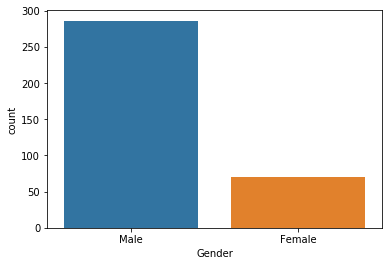

In [36]:
sns.countplot(test.Gender)
plt.show()

In [300]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [225]:
train['Gender'].isnull().sum()

0

In [301]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

In [227]:
test['Gender'].isnull().sum()

0

# Married

In [229]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

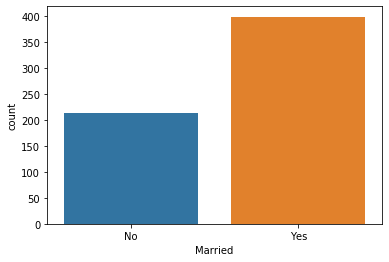

In [95]:
sns.countplot(train.Married)
plt.show()

In [302]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

# Dependents

In [231]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

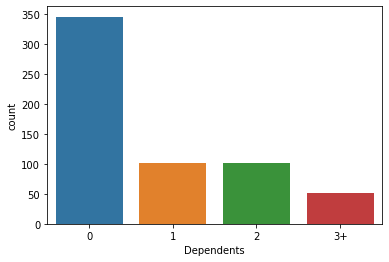

In [94]:
sns.countplot(train.Dependents)
plt.show()

In [303]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

In [304]:
train['Dependents'] = train.Dependents.str.replace('+' , '')
test['Dependents'] = test.Dependents.str.replace('+' , '')

# Education

In [255]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

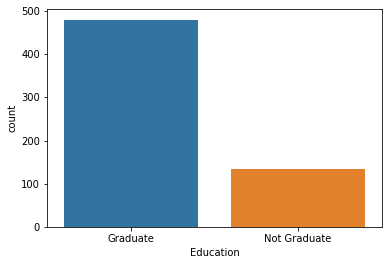

In [93]:
sns.countplot(train.Education)
plt.show()

# Self_Employed

In [246]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

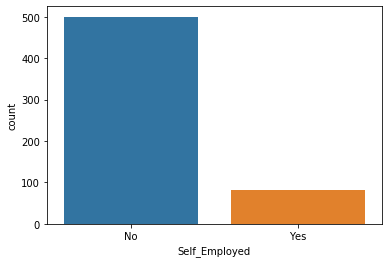

In [92]:
sns.countplot(train.Self_Employed)
plt.show()

In [307]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [308]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

# Credit_History

In [258]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

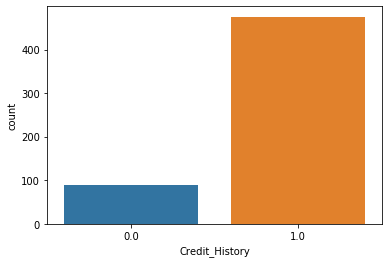

In [91]:
sns.countplot(train.Credit_History)
plt.show()

In [309]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [310]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

# Property_Area

In [80]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

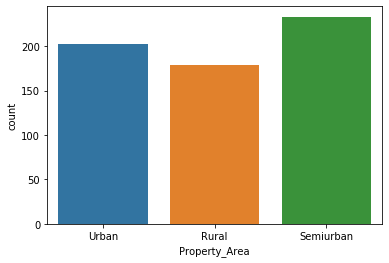

In [90]:
sns.countplot(train.Property_Area)
plt.show()

In [130]:
test['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

# Loan_Status

In [81]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

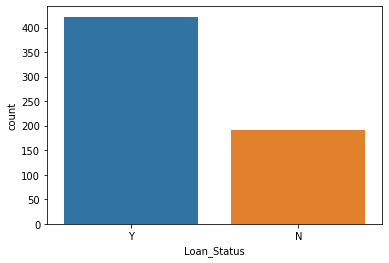

In [88]:
sns.countplot(train.Loan_Status)
plt.show()

# LoanAmount

In [311]:
train['LoanAmount'].median()

128.0

In [312]:
train['LoanAmount'].fillna(128, inplace=True)

In [313]:
test['LoanAmount'].median()

125.0

In [314]:
test['LoanAmount'].fillna(125, inplace=True)

# Loan_Amount_Term

In [315]:
train['Loan_Amount_Term'].median()

360.0

In [316]:
test['Loan_Amount_Term'].median()

360.0

In [317]:
train['Loan_Amount_Term'].fillna(360, inplace=True)

In [318]:
test['Loan_Amount_Term'].fillna(360, inplace=True)

# DEALING CATEGORICAL VARIABLES:

In [321]:
y_test = test.Loan_ID
X_test = test.drop('Loan_ID', axis =1)

In [322]:
train2 = train.drop('Loan_ID', axis =1)

In [323]:
X_train = train2.drop('Loan_Status', 1)
y_train = train2.Loan_Status

In [328]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [329]:
number = LabelEncoder()

In [330]:
X_train['Gender'] = number.fit_transform(X_train['Gender'].astype('str'))
X_test['Gender'] = number.fit_transform(X_test['Gender'].astype('str'))

In [331]:
X_train['Married'] = number.fit_transform(X_train['Married'].astype('str'))
X_test['Married'] = number.fit_transform(X_test['Married'].astype('str'))

In [332]:
X_train['Education'] = number.fit_transform(X_train['Education'].astype('str'))
X_test['Education'] = number.fit_transform(X_test['Education'].astype('str'))

In [333]:
X_train['Self_Employed'] = number.fit_transform(X_train['Self_Employed'].astype('str'))
X_test['Self_Employed'] = number.fit_transform(X_test['Self_Employed'].astype('str'))

In [334]:
X_train['Property_Area'] = number.fit_transform(X_train['Property_Area'].astype('str'))
X_test['Property_Area'] = number.fit_transform(X_test['Property_Area'].astype('str'))

In [335]:
model = RandomForestClassifier(n_estimators = 100, random_state=2)
#model = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion= 'entropy', min_samples_leaf=1, min_samples_split=20, random_state=2)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [336]:
model.score(X_train, y_train)

1.0

In [ ]:
prediction = model.predict(X_test)

In [342]:
output = pd.DataFrame({'Loan_ID': y_test, 'Loan_Status': prediction.astype(str)})

In [343]:
output.to_csv('F:\Dataset\Loan Prediction\sample_submission.csv', index=False)